<a href="https://colab.research.google.com/github/Prasun1608/Computer-Vision-Projects/blob/main/Image_Pre_Processing_(Rose).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


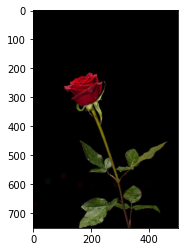

In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt

img= plt.imread('/content/drive/MyDrive/rose.jpg')
plt.imshow(img)

In [ ]:
#The data that we collect or generate is mostly raw data, i.e. it is not fit to be used in applications directly due to a number of possible reasons. 
#Therefore, we need to analyze it first, perform the necessary pre-processing, and then use it.
#For instance, let's assume that we were trying to build a cat classifier. 
#Our program would take an image as input and then tell us whether the image contains a cat or not. 
#The first step for building this classifier would be to collect hundreds of cat pictures. 
#One common issue is that all the pictures we have scraped would not be of the same size/dimensions, so before feeding them to the model for training, we would need to resize/pre-process them all to a standard size.

import cv2
print('Image Properties')
print('No of pixels:', img.size)
print('Dimensions of image:', img.shape)

Image Properties
No of pixels: 1125000
Dimensions of image: (750, 500, 3)


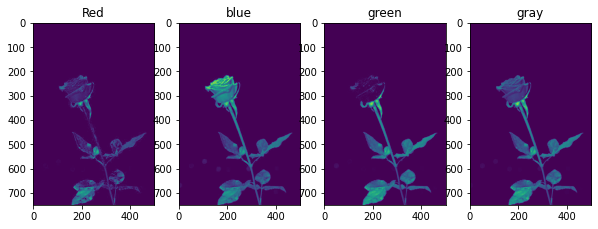

In [ ]:
#Splitting images into different channels 
from google.colab.patches import cv2_imshow

blue, green, red= cv2.split(img)
img_gs= cv2.imread('/content/drive/MyDrive/rose.jpg', cv2.IMREAD_GRAYSCALE)

plt.figure(figsize=(10,10))

plt.subplot(1,4,1)
plt.title('Red')
plt.imshow(red)

plt.subplot(1,4,2)
plt.title('blue')
plt.imshow(blue)

plt.subplot(1,4,3)
plt.title('green')
plt.imshow(green)

plt.subplot(1,4,4)
plt.title('gray')
plt.imshow(img_gs)

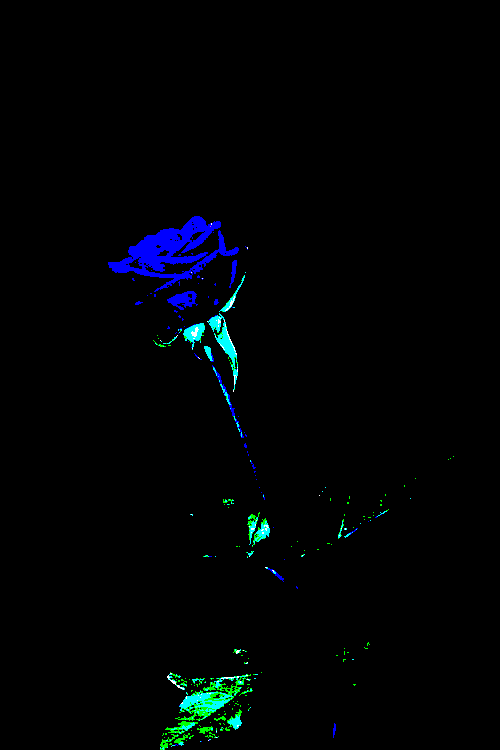

In [ ]:
#Image Thresholding.
r,threshold= cv2.threshold(img, 125, 255, cv2.THRESH_BINARY)  #125 is my threshold value. All greater than 125 are 1 rest all 0. and 0 means black and 1 means white
cv2_imshow(threshold)

In [ ]:
#1: Removing Noise from an Image
#In most cases, the raw data that we gather has noise in it i.e. unwanted features that makes the image hard to perceive. 
#Although these images can be used directly for feature extraction, the accuracy of the algorithm would suffer greatly. 
#This is why image processing is applied to the image before passing it to the algorithm to get better accuracy.

#There are many different types of noise, like Gaussian noise, salt and pepper noise, etc. 
#We can remove that noise from an image by applying a filter which removes that noise, or at the very least, minimizes its effect. 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.


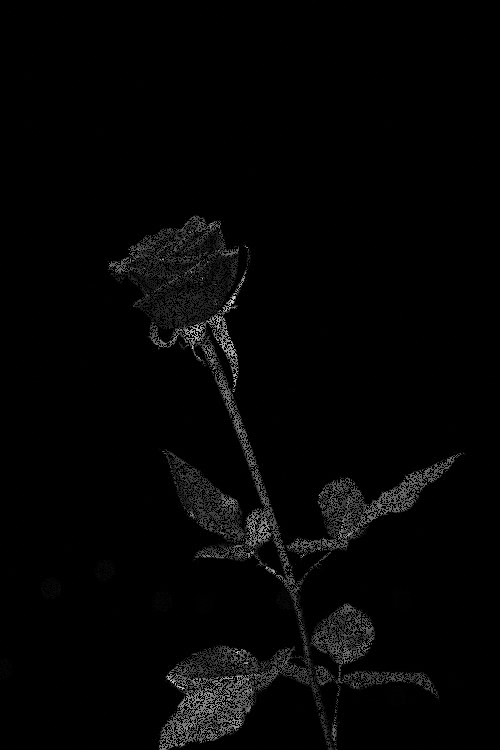

True

In [ ]:
#Now we first add salt and pepper noise to see what it looks like after adding

def salt_pepper(prob):
  #Extraft image dimensions
  row, col= img_gs.shape

  #Declare salt vs perrper noise ratio
  s_vs_p= 0.5
  output= np.copy(img_gs)

  #Apply salt npoise on each pixel individually
  num_salt= np.ceil(prob*img_gs.size*s_vs_p)
  coords= [np.random.randint(0,i-1, int(num_salt)) for i in img_gs.shape]
  output[coords]=1

  num_pepper= np.ceil(prob*img_gs.size*s_vs_p)
  coords=[np.random.randint(0,i-1, int(num_pepper)) for i in img_gs.shape]
  output[coords]=0

  cv2_imshow(output)

  return output


sp_05= salt_pepper(0.5)

#Store the given image as 
cv2.imwrite('sp_05.jpg', sp_05)

#This is the image after noise has been added

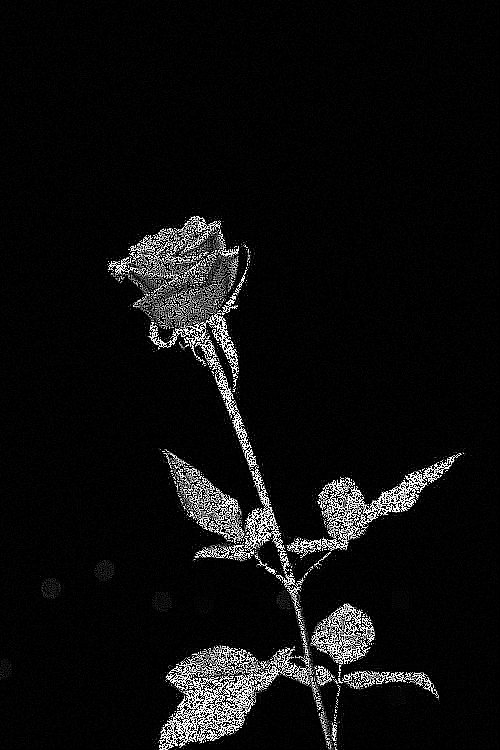

In [ ]:
#Lets apply different filters to see how well they reduce the noise
#Filter of sharpening Kernel

kernel_sharpening= np.array([[-1,-1,-1], [-1,9,-1], [-1,-1,-1]])

#Now apply this filter to Salt and Pepper noise and watching it
sharpened_img= cv2.filter2D(sp_05, -1, kernel_sharpening)   #ddepth= depth of image. if we use -1, means image has same depth as the oringinal image
cv2_imshow(sharpened_img)

#Not a very good filter

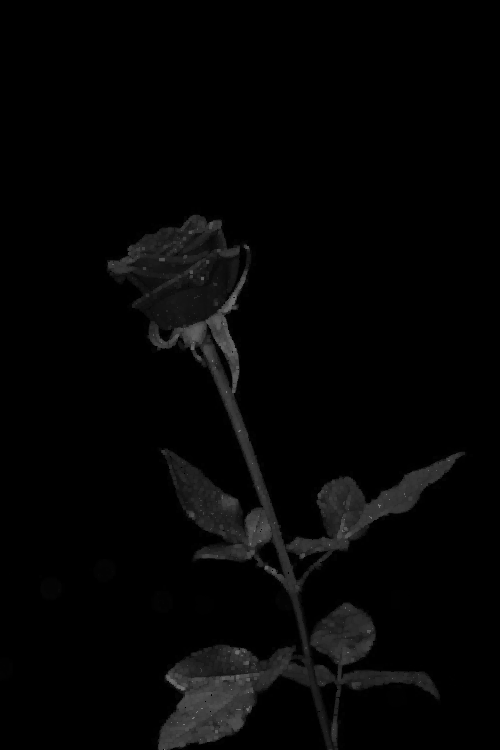

In [ ]:
#Midpoint filter
from scipy.ndimage import maximum_filter, minimum_filter

def midpoint(img):
  maxf= maximum_filter(img, (3,3))
  minf= minimum_filter(img, (3,3))
  midpoint= (maxf+minf)/2
  cv2_imshow(midpoint)


midpoint(sp_05)

#Not very effective

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in true_divide
  


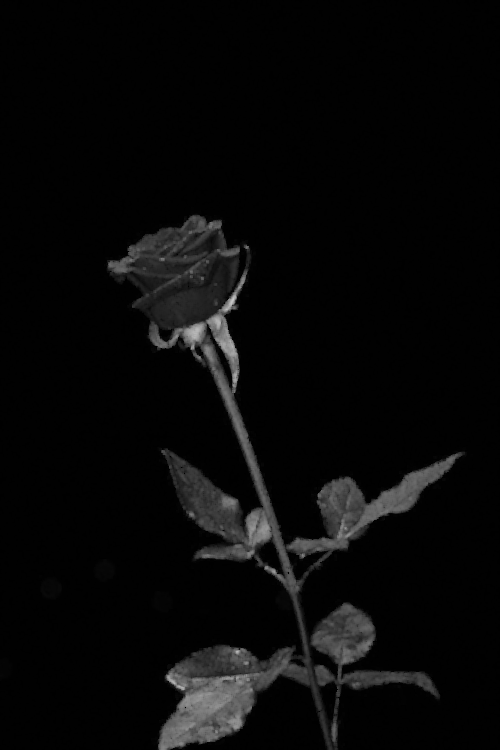

In [ ]:
#Contra harmonic mea
def contraharminic_mean(img, size, Q):
  numerator= np.power(img, Q+1)
  denominator= np.power(img, Q)
  kernel= np.full(size,fill_value= 1.0 ) #Return a new array of given shape and type, filled with fill_value.
  result= cv2.filter2D(numerator, -1, kernel)/ cv2.filter2D(denominator, -1, kernel)

  return result

cmean_img= contraharminic_mean(sp_05, (3,3), 0.5)
cv2_imshow(cmean_img)

#It reduces the noise very much


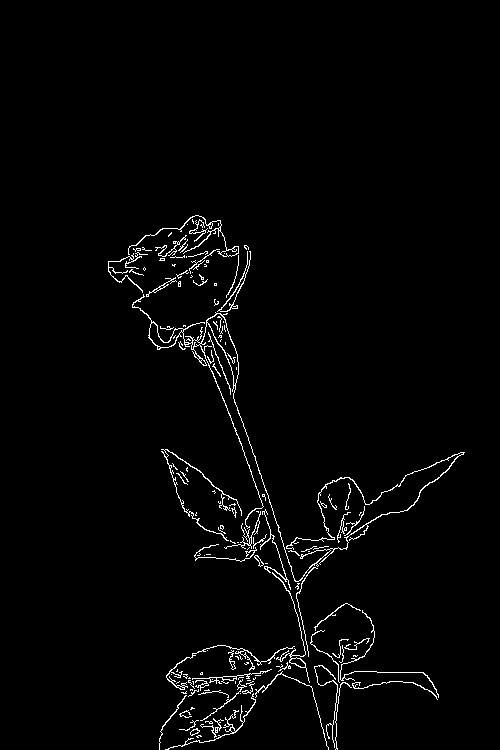

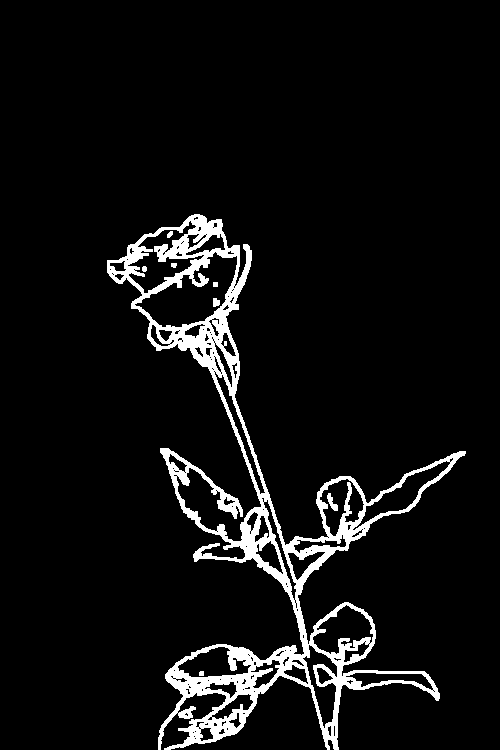

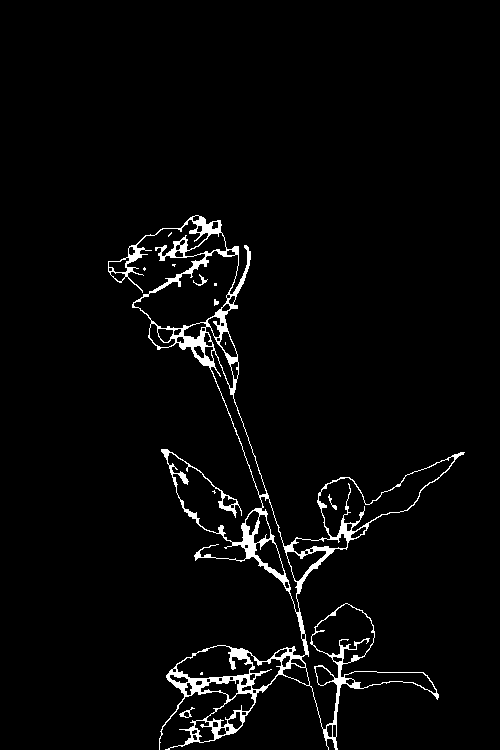

In [ ]:
#Edge detection using Canny edge detector
#In a classification algorithm, the image is first scanned for 'objects' i.e. when you input an image, 
#the algorithm would find all the objects in that image and then compare them against the features of the object that you are trying to find.
# In case of a cat classifier, it would compare all objects found in an image against the features of a cat image, and if a match is found, 
#it tells us that the input image contains a cat.

edges= cv2.Canny(img_gs, 100,200)  #First argument is our input image. Second and third arguments are our minVal and maxVal respectively.

#Hysteresis Thresholding
#This stage decides which are all edges are really edges and which are not. 
#For this, we need two threshold values, minVal and maxVal. Any edges with intensity gradient more than maxVal are sure to be edges and those below minVal are sure to be non-edges, so discarded.
#Those who lie between these two thresholds are classified edges or non-edges based on their connectivity.
# If they are connected to "sure-edge" pixels, they are considered to be part of edges. Otherwise, they are also discarded. 

#To understand the above, there are three key steps that need to be discussed.
#First, it performs noise reduction on the image in a similar manner that we discussed previously. 
#Second, it uses the first derivative at each pixel to find edges. 
#The logic behind this is that the point where an edge exists, there is an abrupt intensity change, 
#which causes a spike in the first derivative's value, hence making that pixel an 'edge pixel'.
#At the end, it performs hysteresis thresholding

#Hysteresis thresholding is an improvement as it makes use of two threshold values instead of one. 
#The reason behind that is, if the threshold value is too high, we might miss some actual edges (true negatives) 
#and if the value is too low, we would get a lot of points classified as edges that actually are not edges (false positives). 
#One threshold value is set high, and one is set low. All points which are above the 'high threshold value' are identified as edges, 
#then all points which are above the low threshold value but below the high threshold value are evaluated; the points which are close to, or are neighbors of, 
#points which have been identified as edges, are also identified as edges and the rest are discarded.

cv2_imshow(edges)

#Two basic morphological operators are Erosion and Dilation
#The basic idea of erosion is just like soil erosion only, 
#it erodes away the boundaries of foreground object (Always try to keep foreground in white). 
#So what does it do? The kernel slides through the image (as in 2D convolution).
# A pixel in the original image (either 1 or 0) will be considered 1 only if all the pixels under the kernel is 1, otherwise it is eroded (made to zero).

#So what happends is that, all the pixels near boundary will be discarded depending upon the size of kernel.
# So the thickness or size of the foreground object decreases or simply white region decreases in the image. 
#It is useful for removing small white noises (as we have seen in colorspace chapter), detach two connected objects etc.

edges= cv2.dilate(edges, None)
cv2_imshow(edges)

#It is just opposite of erosion. Here, a pixel element is ‘1’ if atleast one pixel under the kernel is ‘1’. 
#So it increases the white region in the image or size of foreground object increases. Normally, in cases like noise removal, erosion is followed by dilation. 
#Because, erosion removes white noises, but it also shrinks our object. 
#So we dilate it. Since noise is gone, they won’t come back, but our object area increases. It is also useful in joining broken parts of an object.
edges= cv2.erode(edges, None)
cv2_imshow(edges)

In [ ]:
#Contours can be explained simply as a curve joining all the continuous points (along the boundary), having same color or intensity. 
#The contours are a useful tool for shape analysis and object detection and recognition.

#For better accuracy, use binary images. So before finding contours, apply threshold or canny edge detection.
#Since OpenCV 3.2, findContours() no longer modifies the source image.
#In OpenCV, finding contours is like finding white object from black background.

contour_info=[]
contours,_= cv2.findContours(edges, cv2.RETR_LIST, cv2.CHAIN_APPROX_NONE)

for c in contours:
  contour_info.append((c, cv2.isContourConvex(c), cv2.contourArea(c)))

contour_info= sorted(contour_info, key=lambda c:c[2], reverse=True)
max_contour= contour_info[0]
max_contour

(array([[[195, 215]],
 
        [[194, 216]],
 
        [[193, 216]],
 
        ...,
 
        [[198, 215]],
 
        [[197, 215]],
 
        [[196, 215]]], dtype=int32), False, 31371.5)

In [ ]:
#Contours are defined as the line joining all the points along the boundary of an image that are having the same intensity. 

cv2.drawContours(img, contours, -1, (0,255,0), 3)

array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8)

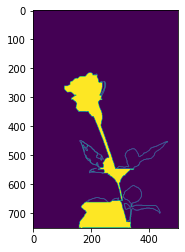

In [ ]:
mask= np.zeros(edges.shape)

cv2.fillConvexPoly(mask, max_contour[0], (255))

plt.imshow(mask)

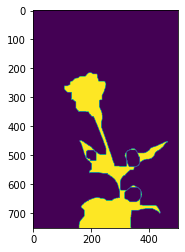

In [ ]:
mask= cv2.dilate(mask, None, iterations= 10)
plt.imshow(mask)

mask= cv2.erode(mask, None, iterations= 10)
plt.imshow(mask)

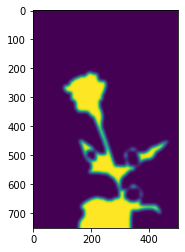

In [ ]:
mask= cv2.GaussianBlur(mask, (21,21),0)
plt.imshow(mask)


#In this approach, instead of a box filter consisting of equal filter coefficients, a Gaussian kernel is used. 
#It is done with the function, cv2.GaussianBlur(). We should specify the width and height of the kernel which should be positive and odd. 
#We also should specify the standard deviation in the X and Y directions, sigmaX and sigmaY respectively. If only sigmaX is specified, sigmaY is taken as equal to sigmaX. 
#If both are given as zeros, they are calculated from the kernel size. Gaussian filtering is highly effective in removing Gaussian noise from the image.
#In the Gaussian and box filters, the filtered value for the central element can be a value which may not exist in the original image.
#Gaussian filter takes the a neighborhood around the pixel and finds its Gaussian weighted average. 
#This Gaussian filter is a function of space alone, that is, nearby pixels are considered while filtering.

In [ ]:
img_orig= cv2.imread('/content/drive/MyDrive/rose.jpg')
mask_color= (0.0,0.0,1.0)

mask_stack= np.dstack([mask]*3)
mask_stack= mask_stack.astype('float32')/255.0
img_masked= img_orig.astype('float32')/255.0

masked= (mask_stack*img_orig)+((1-mask_stack)*mask_color)  #Blending
masked= (masked*255).astype('uint8')

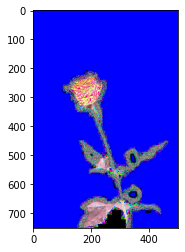

In [ ]:
plt.imshow(masked)

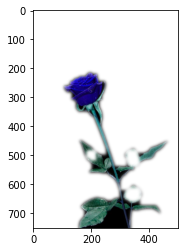

In [ ]:
c_red, c_green, c_blue= cv2.split(img_masked)
img_a= cv2.merge((c_red, c_green, c_blue, mask.astype('float32')/255.0))
plt.imshow(img_a)


#Some of the other methods to remove background are:
#Watershed method, GrabCut method, Background Subtractor